## Timeseries

In [1]:
import pandas as pd

## Field Information Of Dataset

<table class="table table-bordered table-striped resource-summary">
           <thead>
             <tr>
               <th>Field Name</th>
               <th>Order</th>
               <th>Type (Format)</th>
               <th>Description</th>
             </tr>
           </thead>
           <tbody>
           <tr>
               <th>Date</th>
               <td>1</td>
               <td class="type type-date">date (%Y-%m-%d) </td>
               <td>YYYY-MM-DD</td>
             </tr>
            <tr>
               <th>Decimal Date</th>
               <td>2</td>
               <td class="type type-number">number </td>
               <td></td>
             </tr>
            <tr>
               <th>Average</th>
               <td>3</td>
               <td class="type type-number">number </td>
               <td>The monthly mean CO2 mole fraction determined from daily averages. If there are missing days concentrated either early or late in the month, the monthly mean is corrected to the middle of the month using the average seasonal cycle. Missing months are denoted by -99.99.</td>
             </tr>
            <tr>
               <th>Interpolated</th>
               <td>4</td>
               <td class="type type-number">number </td>
               <td>Values from the average column and interpolated values where data are missing. Interpolated values are computed in two steps. First, we compute for each month the average seasonal cycle in a 7-year window around each monthly value. In this way the seasonal cycle is allowed to change slowly over time. We then determine the trend value for each month by removing the seasonal cycle; this result is shown in the trend column. Trend values are linearly interpolated for missing months. The interpolated monthly mean is then the sum of the average seasonal cycle value and the trend value for the missing month.</td>
             </tr>
            <tr>
               <th>Trend</th>
               <td>5</td>
               <td class="type type-number">number </td>
               <td>Seasonally corrected.</td>
             </tr>
            <tr>
               <th>Number of Days</th>
               <td>6</td>
               <td class="type type-number">number </td>
               <td>-1 denotes no data for number of daily averages in the month.</td>
             </tr>
          </tbody>
         </table>

In [2]:
mlo = pd.read_csv('./data/co2-mm-mlo.csv', na_values=-99.99, index_col='Date', parse_dates=True)

In [3]:
mlo.head()

,Decimal Date,Average,Interpolated,Trend,Number of Days
Date,,,,,
1958-03-01,1958.208,315.71,315.71,314.62,-1
1958-04-01,1958.292,317.45,317.45,315.29,-1
1958-05-01,1958.375,317.50,317.50,314.71,-1
1958-06-01,1958.458,NaN,317.10,314.85,-1
1958-07-01,1958.542,315.86,315.86,314.98,-1


In [7]:
mlo.index

DatetimeIndex(['1958-03-01', '1958-04-01', '1958-05-01', '1958-06-01',
               '1958-07-01', '1958-08-01', '1958-09-01', '1958-10-01',
               '1958-11-01', '1958-12-01',
               ...
               '2016-03-01', '2016-04-01', '2016-05-01', '2016-06-01',
               '2016-07-01', '2016-08-01', '2016-09-01', '2016-10-01',
               '2016-11-01', '2016-12-01'],
              dtype='datetime64[ns]', name='Date', length=706, freq=None)

In [8]:
import matplotlib
%matplotlib inline

<AxesSubplot:xlabel='Date'>

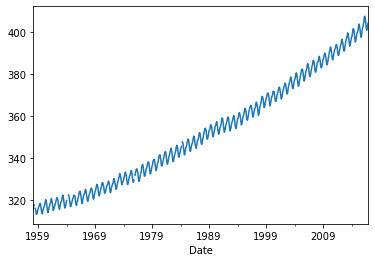

In [9]:
mlo['Average'].plot()

`mlo['Average']` is a timeseries: it a Series object with an index of dtype `datetime64` (from NumPy).

In [13]:
pd.date_range('2017-09-11', periods=5, freq='D')

DatetimeIndex(['2017-09-11', '2017-09-12', '2017-09-13', '2017-09-14',
               '2017-09-15'],
              dtype='datetime64[ns]', freq='D')

In [14]:
pd.date_range('2017-09-11', periods=5, freq='M')

DatetimeIndex(['2017-09-30', '2017-10-31', '2017-11-30', '2017-12-31',
               '2018-01-31'],
              dtype='datetime64[ns]', freq='M')

In [15]:
pd.date_range('2017-09-11', periods=5, freq='Y')

DatetimeIndex(['2017-12-31', '2018-12-31', '2019-12-31', '2020-12-31',
               '2021-12-31'],
              dtype='datetime64[ns]', freq='A-DEC')

In [16]:
pd.date_range('2017-09-01', periods=5, freq='H')

DatetimeIndex(['2017-09-01 00:00:00', '2017-09-01 01:00:00',
               '2017-09-01 02:00:00', '2017-09-01 03:00:00',
               '2017-09-01 04:00:00'],
              dtype='datetime64[ns]', freq='H')

In [17]:
n_hours = 24
hour_index = pd.date_range('2017-09-01', periods=n_hours, freq='H')
hour_index

DatetimeIndex(['2017-09-01 00:00:00', '2017-09-01 01:00:00',
               '2017-09-01 02:00:00', '2017-09-01 03:00:00',
               '2017-09-01 04:00:00', '2017-09-01 05:00:00',
               '2017-09-01 06:00:00', '2017-09-01 07:00:00',
               '2017-09-01 08:00:00', '2017-09-01 09:00:00',
               '2017-09-01 10:00:00', '2017-09-01 11:00:00',
               '2017-09-01 12:00:00', '2017-09-01 13:00:00',
               '2017-09-01 14:00:00', '2017-09-01 15:00:00',
               '2017-09-01 16:00:00', '2017-09-01 17:00:00',
               '2017-09-01 18:00:00', '2017-09-01 19:00:00',
               '2017-09-01 20:00:00', '2017-09-01 21:00:00',
               '2017-09-01 22:00:00', '2017-09-01 23:00:00'],
              dtype='datetime64[ns]', freq='H')

In [18]:
import numpy as np

2017-09-01 00:00:00    0.164609
2017-09-01 01:00:00    0.009956
2017-09-01 02:00:00    0.378987
2017-09-01 03:00:00    0.909943
2017-09-01 04:00:00    0.753480
2017-09-01 05:00:00    0.975132
2017-09-01 06:00:00    0.070872
2017-09-01 07:00:00    0.886516
2017-09-01 08:00:00    0.871309
2017-09-01 09:00:00    0.973235
2017-09-01 10:00:00    0.302175
2017-09-01 11:00:00    0.329812
2017-09-01 12:00:00    0.128213
2017-09-01 13:00:00    0.799900
2017-09-01 14:00:00    0.625495
2017-09-01 15:00:00    0.150007
2017-09-01 16:00:00    0.009263
2017-09-01 17:00:00    0.704832
2017-09-01 18:00:00    0.626042
2017-09-01 19:00:00    0.071001
2017-09-01 20:00:00    0.195805
2017-09-01 21:00:00    0.068076
2017-09-01 22:00:00    0.407775
2017-09-01 23:00:00    0.129948
Freq: H, dtype: float64


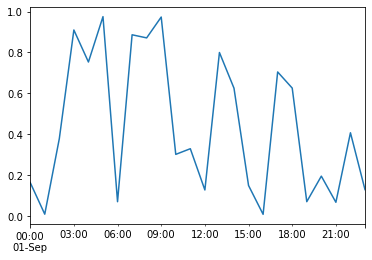

In [23]:
x = pd.Series(np.random.rand(n_hours),index=hour_index)
x.plot()
print(x)

## Rolling window operations

We may want to smooth out seasonal fluctuations by computing a rolling (or moving) average.

In [24]:
mlo['Interpolated'].notnull().value_counts()

True    706
Name: Interpolated, dtype: int64

In [25]:
s = mlo['Interpolated']

In [26]:
s

Date
1958-03-01    315.71
1958-04-01    317.45
1958-05-01    317.50
1958-06-01    317.10
1958-07-01    315.86
               ...  
2016-08-01    402.25
2016-09-01    401.03
2016-10-01    401.57
2016-11-01    403.53
2016-12-01    404.48
Name: Interpolated, Length: 706, dtype: float64

<AxesSubplot:xlabel='Date'>

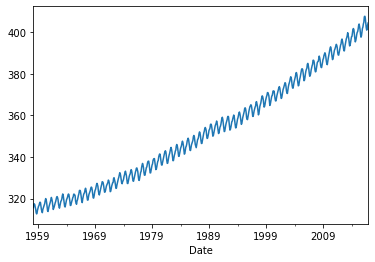

In [27]:
s.plot()

Let us select only the first two years of the `s` timeseries. Note that string indexing works.

<AxesSubplot:xlabel='Date'>

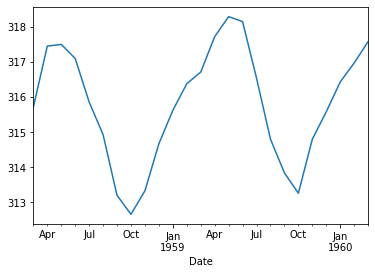

In [29]:
s[:'1960-03-01'].plot()

Even partial string indexing works!

<AxesSubplot:xlabel='Date'>

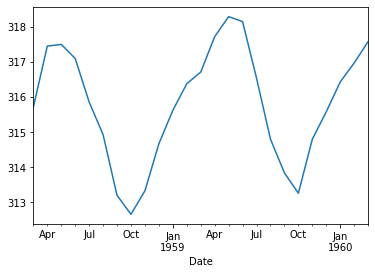

In [31]:
s[:'1960-03'].plot()

In [33]:
s[:'1960-01'].rolling(12).mean()

Date
1958-03-01           NaN
1958-04-01           NaN
1958-05-01           NaN
1958-06-01           NaN
1958-07-01           NaN
1958-08-01           NaN
1958-09-01           NaN
1958-10-01           NaN
1958-11-01           NaN
1958-12-01           NaN
1959-01-01           NaN
1959-02-01    315.367500
1959-03-01    315.450833
1959-04-01    315.473333
1959-05-01    315.539167
1959-06-01    315.626667
1959-07-01    315.683333
1959-08-01    315.672500
1959-09-01    315.725833
1959-10-01    315.775833
1959-11-01    315.898333
1959-12-01    315.974167
1960-01-01    316.041667
Name: Interpolated, dtype: float64

<AxesSubplot:xlabel='Date'>

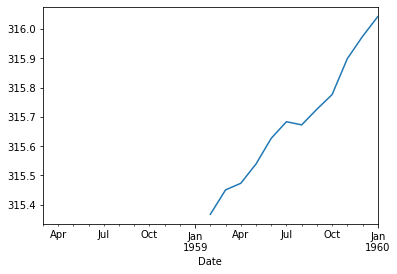

In [34]:
s[:'1960-01'].rolling(12).mean().plot()

<AxesSubplot:xlabel='Date'>

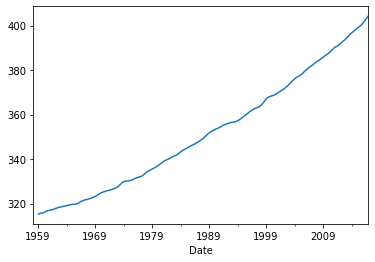

In [35]:
s.rolling(12).mean().plot()

Let us create a DataFrame which stores `mlo` plus this rolling average in a new column (labelled `smooth`).

In [36]:
df = mlo.assign(smooth=s.rolling(12).mean())

In [37]:
df

,Decimal Date,Average,Interpolated,Trend,Number of Days,smooth
Date,,,,,,
1958-03-01,1958.208,315.71,315.71,314.62,-1,NaN
1958-04-01,1958.292,317.45,317.45,315.29,-1,NaN
1958-05-01,1958.375,317.50,317.50,314.71,-1,NaN
1958-06-01,1958.458,NaN,317.10,314.85,-1,NaN
1958-07-01,1958.542,315.86,315.86,314.98,-1,NaN
...,...,...,...,...,...,...
2016-08-01,2016.625,402.25,402.25,404.09,23,403.157500
2016-09-01,2016.708,401.03,401.03,404.52,24,403.440833
2016-10-01,2016.792,401.57,401.57,404.93,29,403.714167


<AxesSubplot:xlabel='Date'>

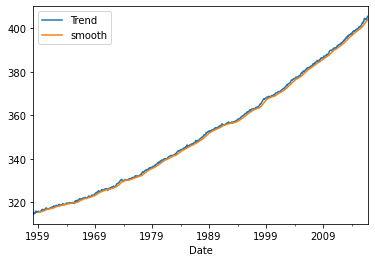

In [38]:
df[['Trend', 'smooth']].plot()

### Hands-on exercises

1. We can specify a window type when computing the rolling operation. What do you expect `s.rolling(12, win_type='triang').mean()` should yield?
2. Plot it to confirm (confront) your assumption. Plot the difference between the above and `mlo['Trend']`

In [39]:
s.rolling(12, win_type='triang').mean()

Date
1958-03-01           NaN
1958-04-01           NaN
1958-05-01           NaN
1958-06-01           NaN
1958-07-01           NaN
                 ...    
2016-08-01    404.120139
2016-09-01    404.770417
2016-10-01    405.059861
2016-11-01    404.978611
2016-12-01    404.633472
Name: Interpolated, Length: 706, dtype: float64

In [40]:
mlo['Trend']

Date
1958-03-01    314.62
1958-04-01    315.29
1958-05-01    314.71
1958-06-01    314.85
1958-07-01    314.98
               ...  
2016-08-01    404.09
2016-09-01    404.52
2016-10-01    404.93
2016-11-01    405.57
2016-12-01    405.25
Name: Trend, Length: 706, dtype: float64

## The PeriodIndex object

Using `.rolling()` with a time-based index is similar to resampling; `.rolling()` is a time-based window operation, while `.resample()` is a frequency-based window operation.

In [43]:
s.index

DatetimeIndex(['1958-03-01', '1958-04-01', '1958-05-01', '1958-06-01',
               '1958-07-01', '1958-08-01', '1958-09-01', '1958-10-01',
               '1958-11-01', '1958-12-01',
               ...
               '2016-03-01', '2016-04-01', '2016-05-01', '2016-06-01',
               '2016-07-01', '2016-08-01', '2016-09-01', '2016-10-01',
               '2016-11-01', '2016-12-01'],
              dtype='datetime64[ns]', name='Date', length=706, freq=None)

In [44]:
s['1958-03':'1958-06']

Date
1958-03-01    315.71
1958-04-01    317.45
1958-05-01    317.50
1958-06-01    317.10
Name: Interpolated, dtype: float64

Notice that each value is associated with a point in time (most usual type of timeseries data), but really it should be associated with a time interval (value holds for the entire month). Pandas provide a `Period` object, opposite the expected `Timestamp` object.

In [45]:
pd.Timestamp('1958-03-01')

Timestamp('1958-03-01 00:00:00')

In [46]:
pd.Period('1958-03-01', freq='M')

Period('1958-03', 'M')

In [49]:
monthly_index = pd.period_range('1958-03-01', periods=706, freq='M')
monthly_index

PeriodIndex(['1958-03', '1958-04', '1958-05', '1958-06', '1958-07', '1958-08',
             '1958-09', '1958-10', '1958-11', '1958-12',
             ...
             '2016-03', '2016-04', '2016-05', '2016-06', '2016-07', '2016-08',
             '2016-09', '2016-10', '2016-11', '2016-12'],
            dtype='period[M]', length=706, freq='M')

In [50]:
s.index = monthly_index

In [51]:
s['1958']

1958-03    315.71
1958-04    317.45
1958-05    317.50
1958-06    317.10
1958-07    315.86
1958-08    314.93
1958-09    313.20
1958-10    312.66
1958-11    313.33
1958-12    314.67
Freq: M, Name: Interpolated, dtype: float64

## Resampling

We can down-sample the timeseries (going to a lower frequency), if we are interested in the minimum value over 3-month bins (for a list of convenient aliases, see http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases).

In [53]:
s.head(15)

1958-03    315.71
1958-04    317.45
1958-05    317.50
1958-06    317.10
1958-07    315.86
1958-08    314.93
1958-09    313.20
1958-10    312.66
1958-11    313.33
1958-12    314.67
1959-01    315.62
1959-02    316.38
1959-03    316.71
1959-04    317.72
1959-05    318.29
Freq: M, Name: Interpolated, dtype: float64

In [60]:
re = s.resample('3Y').min()
re.head()

1958    312.66
1961    314.80
1964    316.70
1967    319.31
1970    323.10
Freq: 3A-DEC, Name: Interpolated, dtype: float64

If we wanted to compute the difference between `re` values and `mlo['Trend']` values, we would have to begin with up-sampling `re`.

In [58]:
up = re.resample('3M').asfreq()
up.head(10)

1958-01    312.66
1958-04       NaN
1958-07       NaN
1958-10       NaN
1959-01       NaN
1959-04       NaN
1959-07       NaN
1959-10       NaN
1960-01       NaN
1960-04       NaN
Freq: 3M, Name: Interpolated, dtype: float64